Forecasting

In [2]:
library(fpp3)

── Attaching packages ────────────────────────────────────────────── fpp3 0.5 ──

✔ tibble      3.2.1     ✔ tsibble     1.1.3
✔ dplyr       1.1.3     ✔ tsibbledata 0.4.1
✔ tidyr       1.3.0     ✔ feasts      0.3.1
✔ lubridate   1.9.3     ✔ fable       0.3.3
✔ ggplot2     3.4.3     ✔ fabletools  0.3.4

── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()



Data Preparation (tidy)

In [3]:
gdppc <- global_economy|>mutate(GDP_per_capita= GDP/Population)

Plot the data(visualize)

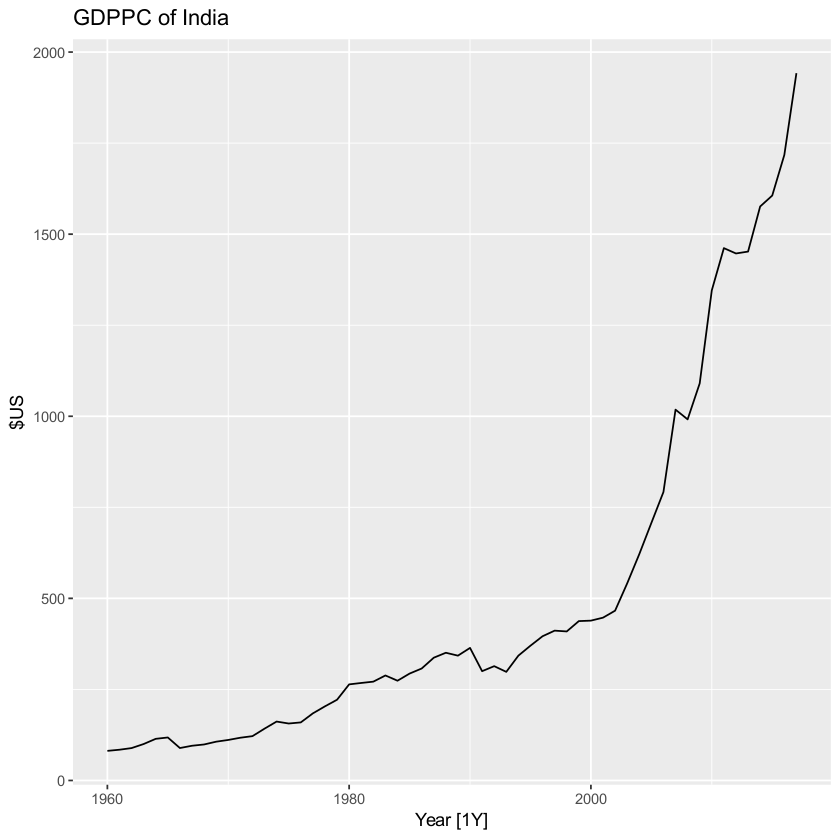

In [4]:
gdppc|>filter(Country=="India")|>autoplot(GDP_per_capita)+labs(y="$US", title="GDPPC of India")

Defina a model(specify)

In [5]:
library(fable)

In [6]:
?fable

fable                package:fabletools                R Documentation

_C_r_e_a_t_e _a _f_a_b_l_e _o_b_j_e_c_t

_D_e_s_c_r_i_p_t_i_o_n:

     A fable (forecast table) data class (‘fbl_ts’) which is a
     tsibble-like data structure for representing forecasts. In
     extension to the key and index from the tsibble (‘tbl_ts’) class,
     a fable (‘fbl_ts’) must also contain a single distribution column
     that uses values from the distributional package.

_U_s_a_g_e:

     fable(..., response, distribution)
     
_A_r_g_u_m_e_n_t_s:

     ...: Arguments passed to ‘tsibble::tsibble()’.

response: The character vector of response variable(s).

distribution: The name of the distribution column (can be provided
          using a bare expression).


In [8]:
# We forecast using models/ fable library includes models which can be used using the formula (y~x) interface.



Train the model

In [9]:
# Once an appropriate model is specified, we next train the model on some data. One or more model specifications can be estimated using the model() function


fit <- gdppc|> model(trend_model = TSLM(GDP_per_capita ~ trend()))

Warning message:
“7 errors (1 unique) encountered for trend_model
[7] 0 (non-NA) cases
”


In [10]:
# This fits a linear trend modeol to the GDP per capita data for each combination of key variable in the tsibble. In this example, it will fit a model to each of the 263 countries in the dataset. The resulting object is amodel table or a "mable"
fit

Country,trend_model
<fct>,<model>
Afghanistan,<TSLM>
Albania,<TSLM>
Algeria,<TSLM>
American Samoa,<TSLM>
Andorra,<TSLM>
Angola,<TSLM>
Antigua and Barbuda,<TSLM>
Arab World,<TSLM>
Argentina,<TSLM>


In [11]:
# Each row correspoinds to one combination of the key variables. The trend_model column conatains information about the fitted model for each coutnry. In later chapters we will learn how to see more information aboukt each model

Check model performance(evaluate)

In [12]:
# this will be discussed in the sections of 5.8 and 5.9

Produce forecasts(forecast)

In [13]:
# Once a model has been fitted, it is important to check how ell it has performed on the data. There are several diagnostic tools available to chekck model behaviour, and also accuracy measures that allow one model to be compared against another. 



Produce forecasts(forecast)

In [14]:
fit|> forecast(h="7 years")

Country,.model,Year,GDP_per_capita,.mean
<fct>,<chr>,<dbl>,<dist>,<dbl>
Afghanistan,trend_model,2018,"N(526, 9653)",526.1364
Afghanistan,trend_model,2019,"N(534, 9689)",534.1668
Afghanistan,trend_model,2020,"N(542, 9727)",542.1972
Afghanistan,trend_model,2021,"N(550, 9766)",550.2276
Afghanistan,trend_model,2022,"N(558, 9806)",558.2580
Afghanistan,trend_model,2023,"N(566, 9847)",566.2884
Afghanistan,trend_model,2024,"N(574, 9889)",574.3188
Albania,trend_model,2018,"N(4716, 476419)",4716.3414
Albania,trend_model,2019,"N(4867, 481086)",4867.1832


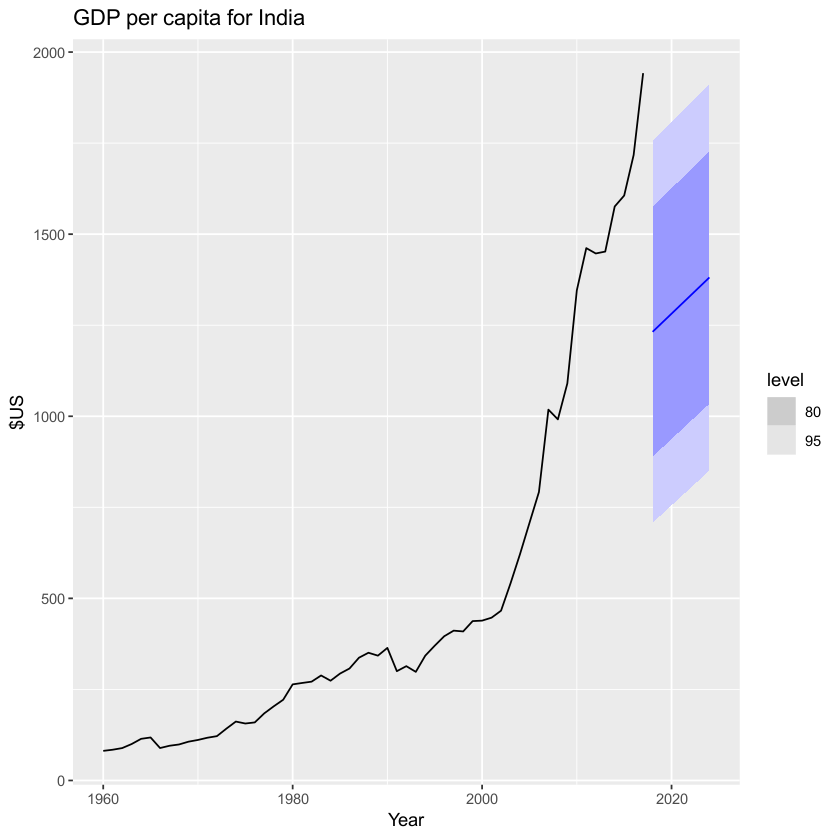

In [15]:
# This is a forecast table or fable. Each row correspinds to one forecast period for each coutnry. The GDP_per_capita column contains the forecast distribution while the .mean column contains the point forecast. The point forecast is the mean of the forecast distribution



# The forecastst can be plotted along with the historical data using autoplot() as follows


fit|>
forecast(h=7)|>
filter(Country == "India")|>
autoplot(gdppc)+
labs(y="$US", title="GDP per capita for India")

5.2 Some simple forecasting methods

In [16]:
bricks <- aus_production |> filter_index("1970 Q1"~"2004 Q4") |> select(Bricks)
# The filter_index() function is a vonvenienet shorthand for extracting a section of a time

In [17]:
tail(bricks)

Bricks,Quarter
<dbl>,<qtr>
440,2003 Q3
413,2003 Q4
409,2004 Q1
423,2004 Q2
428,2004 Q3
397,2004 Q4


Mean method

In [18]:
# Here the forecasts of all futurre values are equal to the average of the historical dta.

In [19]:
bricks|> model(MEAN(Bricks))

MEAN(Bricks)
<model>
<MEAN>


Naive method

In [20]:
# For naive forecasts, we simply set all forecasts to be the value of the last observation

bricks |> model(NAIVE(Bricks))|>pull()

<lst_mdl[1]>
[1] <NAIVE>

Snaive


In [21]:
bricks |> model(SNAIVE(Bricks ~ lag("year")))

"SNAIVE(Bricks ~ lag(""year""))"
<model>
<SNAIVE>


In [22]:
bricks |> model(RW(Bricks ~ drift()))

RW(Bricks ~ drift())
<model>
<RW w/ drift>


Example: Australian quarterly beeer production

In [23]:
# set trainign data fro 1992 to 2006

train<- aus_production |> filter_index("1992 Q1"~"2006 Q4")


In [24]:
# Fit the models

beer_fit <- train|> model(mean = MEAN(Beer), `Naive`=NAIVE(Beer), `Seasonal naive`=SNAIVE(Beer))

Plot variable not specified, automatically selected `.vars = Beer`


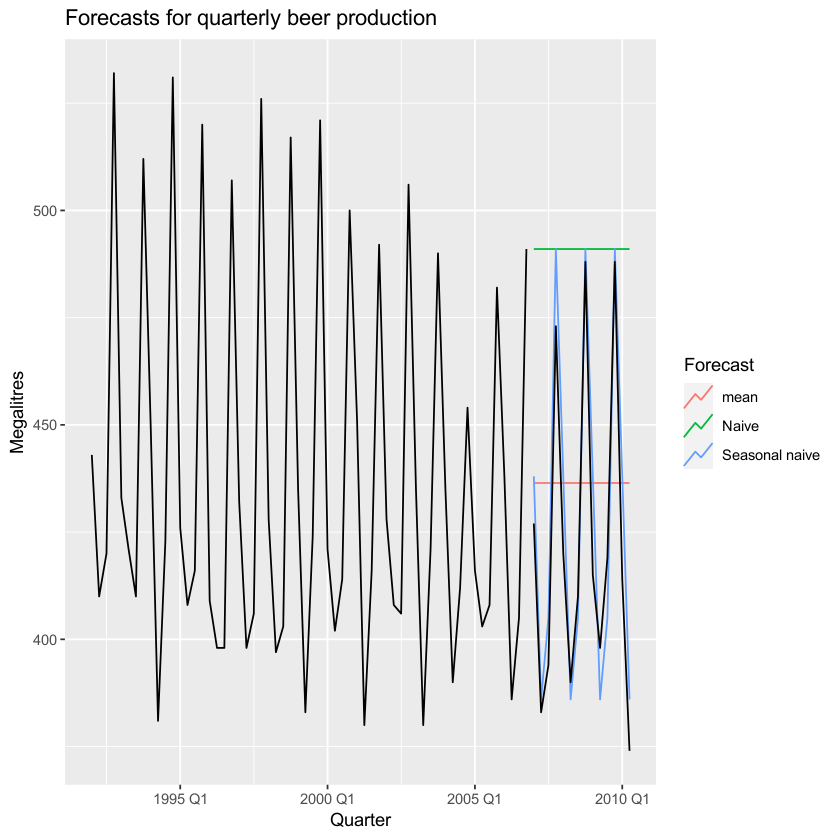

In [25]:
# Generate forecasts for 14 quarters

beer_fc <- beer_fit|> forecast(h=14)


# plot forecasts against actual values

beer_fc |> autoplot(train, level = NULL)+autolayer(filter_index(aus_production, "2007 Q1" ~.),
colour = "black") + labs(y = "Megalitres", title="Forecasts for quarterly beer production") +
guides(colour = guide_legend(title = "Forecast"))

In [26]:
# In  the above case, only the seasonal naive forecasts are close to the observed values from 2007 onwards

Example: Google's daily closing stock price

In [27]:
# the non-seasonal methods are applied to Google daily closing stock price in 2015 and used to forecast one month ahead. Because stock prices are not observed every day, we first set up a new time index based onthe trading days rather than calender days.

# Re-index based on trading days

google_stock <- gafa_stock|> filter(Symbol=="GOOG", year(Date)>=2007)|>
mutate(day = row_number())|>update_tsibble(index = day, regular=T)

In [28]:
head(google_stock)

Symbol,Date,Open,High,Low,Close,Adj_Close,Volume,day
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
GOOG,2014-01-02,554.1259,555.2636,550.5492,552.9635,552.9635,3666400,1
GOOG,2014-01-03,553.8975,554.8562,548.8950,548.9297,548.9297,3355000,2
GOOG,2014-01-06,552.9089,555.8149,549.6451,555.0499,555.0499,3561600,3
GOOG,2014-01-07,558.8651,566.1627,556.9575,565.7504,565.7504,5138400,4
GOOG,2014-01-08,569.2972,569.9530,562.9833,566.9277,566.9277,4514100,5
GOOG,2014-01-09,568.0255,568.4130,559.1433,561.4682,561.4682,4196000,6


In [29]:
#Now filter the year of interest

google_2014 <- google_stock|>filter(year(Date)==2014)


In [30]:
# Fit the models

google_fit <- google_2014|> model(Mean = MEAN(Close),`Naive`=NAIVE(Close), Drift=NAIVE(Close~drift()))

In [31]:
# produce forecasts for the trading days in january 2016

google_jan_2016 <- google_stock|> filter(yearmonth(Date) == yearmonth("2016 Jan"))

google_fc <- google_fit|>forecast(new_data = google_jan_2016)

In [32]:
google_jan_2016

Symbol,Date,Open,High,Low,Close,Adj_Close,Volume,day
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
GOOG,2016-01-04,743.00,744.060,731.258,741.84,741.84,3272800,505
GOOG,2016-01-05,746.45,752.000,738.640,742.58,742.58,1950700,506
GOOG,2016-01-06,730.00,747.180,728.920,743.62,743.62,1947000,507
GOOG,2016-01-07,730.31,738.500,719.060,726.39,726.39,2963700,508
GOOG,2016-01-08,731.45,733.230,713.000,714.47,714.47,2450900,509
GOOG,2016-01-11,716.61,718.855,703.540,716.03,716.03,2089300,510
GOOG,2016-01-12,721.68,728.750,717.317,726.07,726.07,2024500,511
GOOG,2016-01-13,730.85,734.740,698.610,700.56,700.56,2501700,512
GOOG,2016-01-14,705.38,721.925,689.100,714.72,714.72,2225800,513


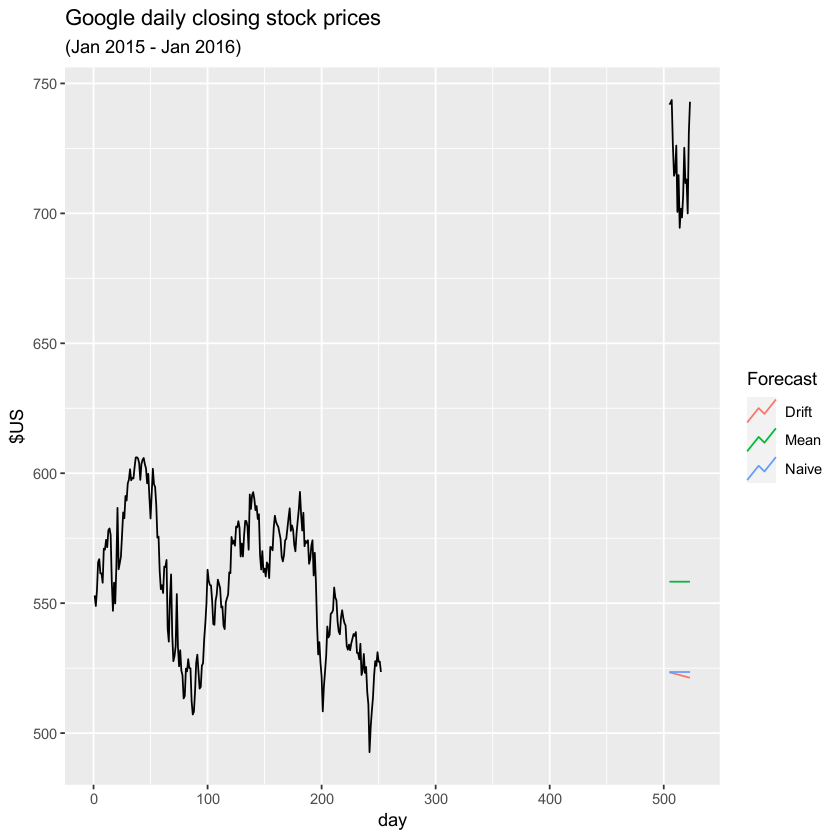

In [33]:
# Plot the forecasts

google_fc |> autoplot(google_2014, level=NULL)+
autolayer(google_jan_2016, Close, colour="black")+
labs(y = "$US", title="Google daily closing stock prices", subtitle="(Jan 2015 - Jan 2016)") + guides(colour = guide_legend(title="Forecast"))

In [34]:
# Sometimes one of these simple mehthods will be the best forecasting method available, but in many cases these mehtods will serve as benchmarks rather than the method of choice. That is any forecasting methods we develop will be compared to these simple mehtods to ensure that the new mehtod is better than thse simple alternative. If not the new mwthod is not worth considering

In [35]:
# yt = c
# where c is the average computed over all available observations, including those at times after t. Similarly for the drift mehtod, the drift  parameter is estimated using all available observations. In this case the fitted values are given by 

# yt = yt-1 + c

# In both cases, there is a parameter to be estimated frokm the data. The "hat" above the c reminds us that this is an estimate. When the estimate of c involves observations after time t, the fitted values are not true forecasts. On the other hand, naive or seasonal naive forecasts do not involve nay parameters, and so fitted values are true forecasts in such cases..



# Residuals

# residuals et = yreal - ypred


# If a transformation has been used in the model, then it is often useful to look at residuals on the tranformed scale. We calll these innovation residuals. For example, suppose wel modellled the logarithms of the data wt = log(yt). Then the innovaiton residuals are given by 




# The fitted values and residuals fromk a model an be obtained using the augment(). funciton. In the beer producation example in the previous section we saved the fitted models as beer\


augment(beer_fit)

.model,Quarter,Beer,.fitted,.resid,.innov
<chr>,<qtr>,<dbl>,<dbl>,<dbl>,<dbl>
mean,1992 Q1,443,436.45,6.55,6.55
mean,1992 Q2,410,436.45,-26.45,-26.45
mean,1992 Q3,420,436.45,-16.45,-16.45
mean,1992 Q4,532,436.45,95.55,95.55
mean,1993 Q1,433,436.45,-3.45,-3.45
mean,1993 Q2,421,436.45,-15.45,-15.45
mean,1993 Q3,410,436.45,-26.45,-26.45
mean,1993 Q4,512,436.45,75.55,75.55
mean,1994 Q1,449,436.45,12.55,12.55


In [36]:
#.innov contains the innovation residuals which , in this case, are indentical to the regular residuals

# Residuals are useful in checking whether a model has adequately captured the information in the data. For this purpose, we use innovation residuals.


# If patterns are observable in the innovation residuals, the model can probably be improved. We will look at some tools for exploring patterns in residuals in the next section




5.4 --  Residual diagnostics

In [37]:
# Residuals provide significant information

# The innovation residuals are uncorrelated. If there are correlations between innovation  residuals, then there is information left in the residuals which should be used in computing forecasts.


#  The innovation residuals have zero mean. If they have a mean other than zero, then the forecasts are biased

# The forecasting method can be modfified to give better forecasts. Adjusting for bias is easy: if the residuals have mean m, then simple add m to all forecasts and the bias problem is solved. Fixing the correlation problem is harder, and we will not address it until chap 10

# The innovation residuals have constant variance. This is known as homoscedasticity

#  The innovation residuals are normally distributed





In [38]:
# sometimes the best forecasting method is often the naive method


# That is each forecast is simply equat tot he last observed value, or yt = yt-1. Hence the residuals are simply equal to the difference between consecutive observations

In [39]:
# Example: Forecasting Google daily closing stock prices

# we will continue with the google daily closing stock price example/ For stock market prices and indexes



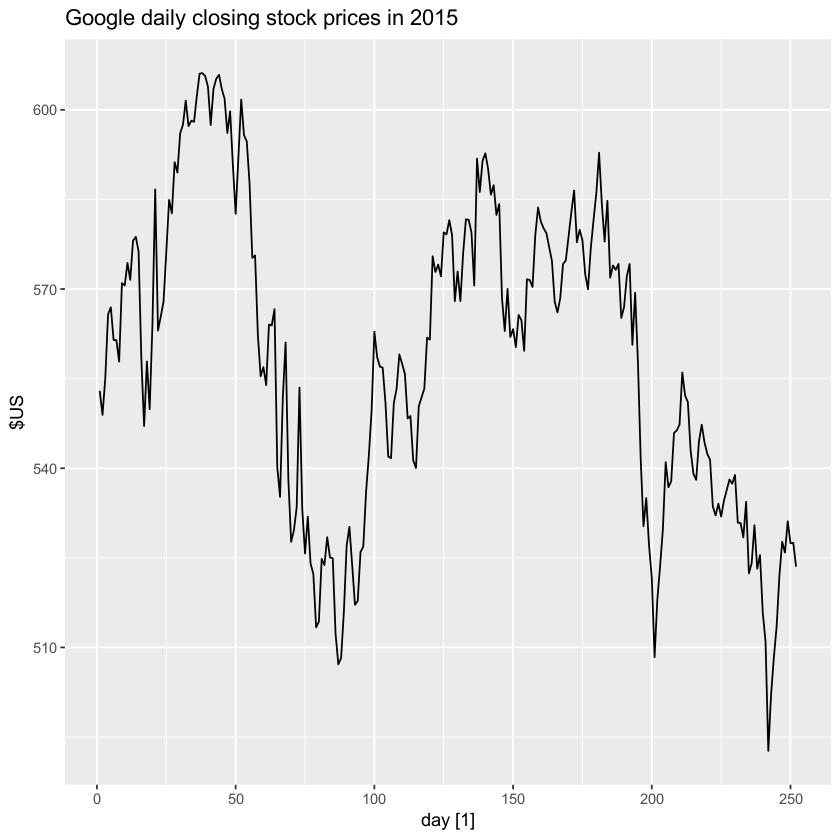

In [40]:
autoplot(google_2014, Close) + labs(y="$US", title="Google daily closing stock prices in 2014")

In [42]:
#  The residuals obtained form forecasting this series using the naive method are shown in Figure 5.10 The large positive residual is a result of the unexpected price jump in JUly


aug<- google_2014|> model(NAIVE(Close))|> augment()

Warning message:
“Removed 1 row containing missing values (`geom_line()`).”


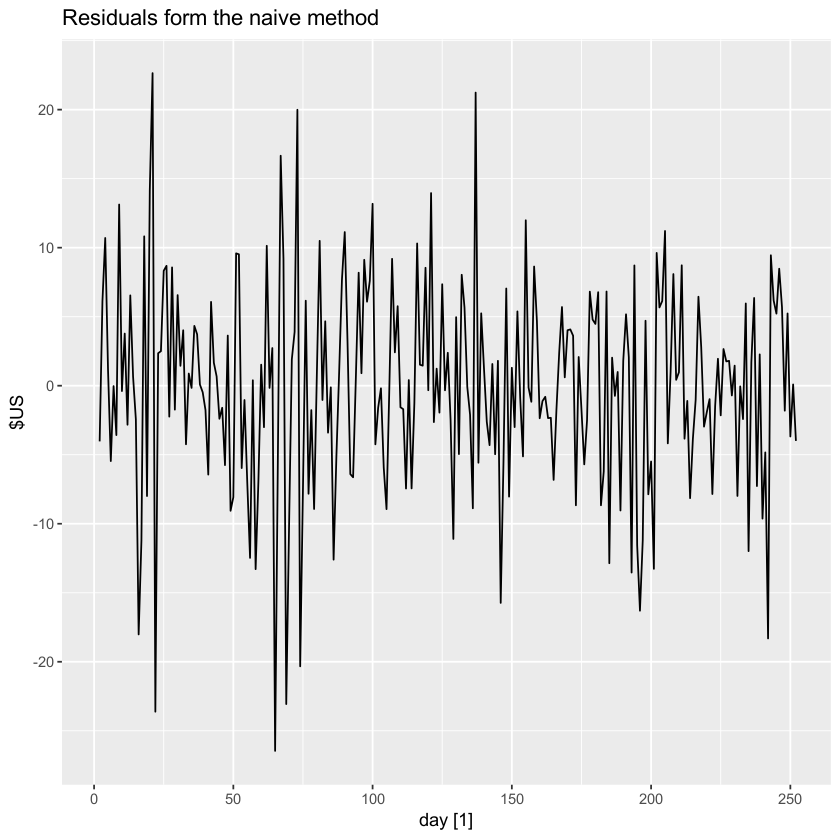

In [43]:
autoplot(aug, .innov) + labs(y = "$US", title = "Residuals form the naive method")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


Warning message:
“Removed 1 rows containing non-finite values (`stat_bin()`).”


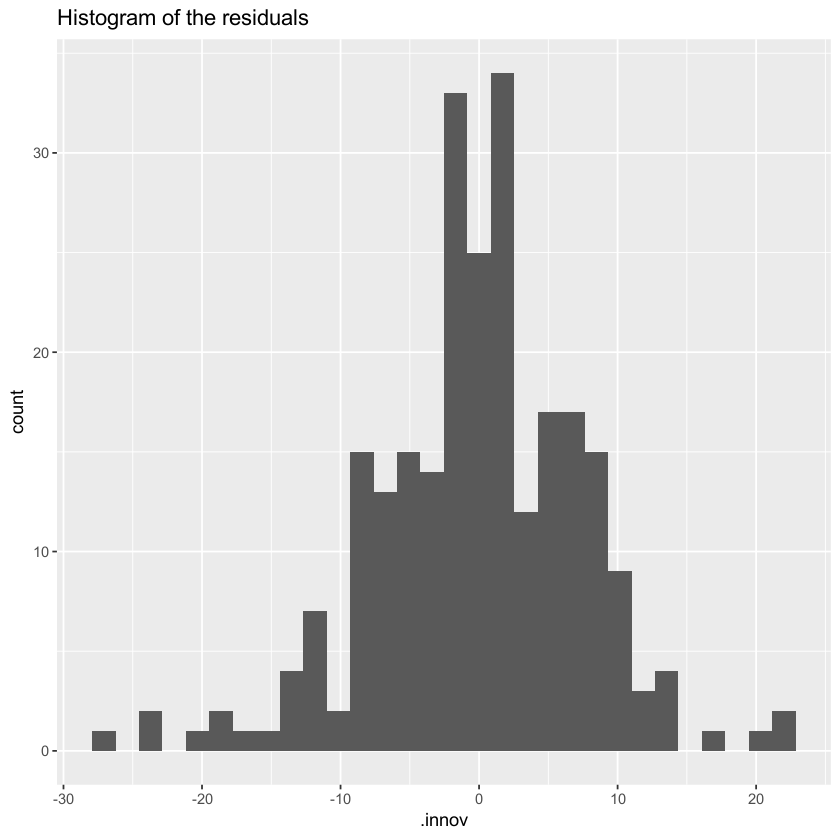

In [45]:
aug|> ggplot(aes(x=.innov)) + geom_histogram()+ labs(title="Histogram of the residuals")

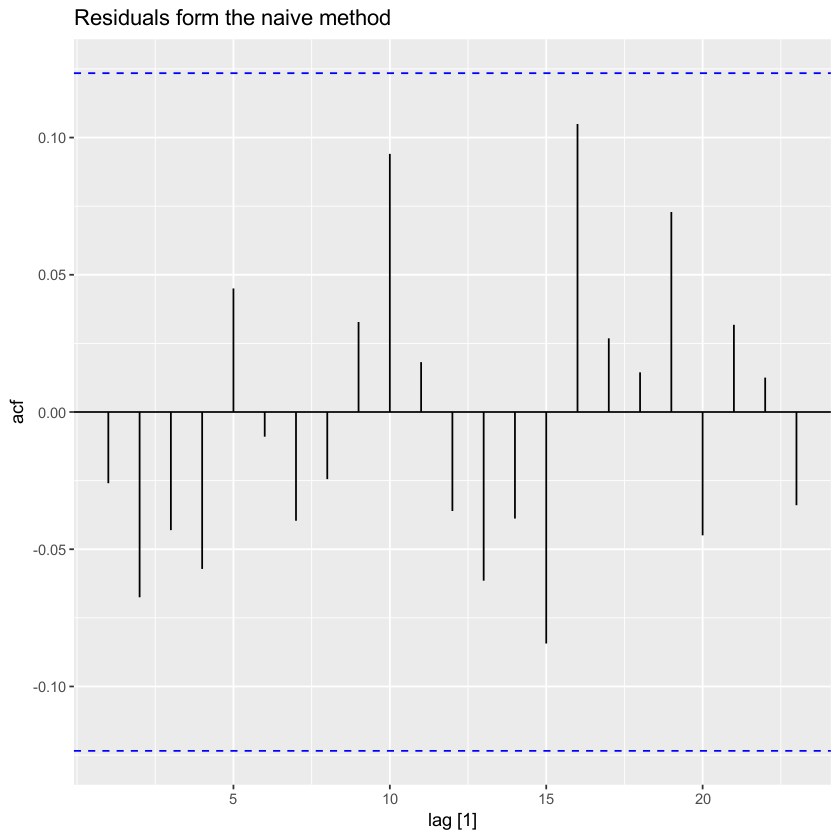

In [46]:
# Lets plot the ACF

aug|> ACF(.innov)|> autoplot() + labs(title = "Residuals form the naive method")

In [ ]:
# THese graphs show that the naive method produces forecasts that appear to account for all available information.

Warning message:
“Removed 1 row containing missing values (`geom_line()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_bin()`).”


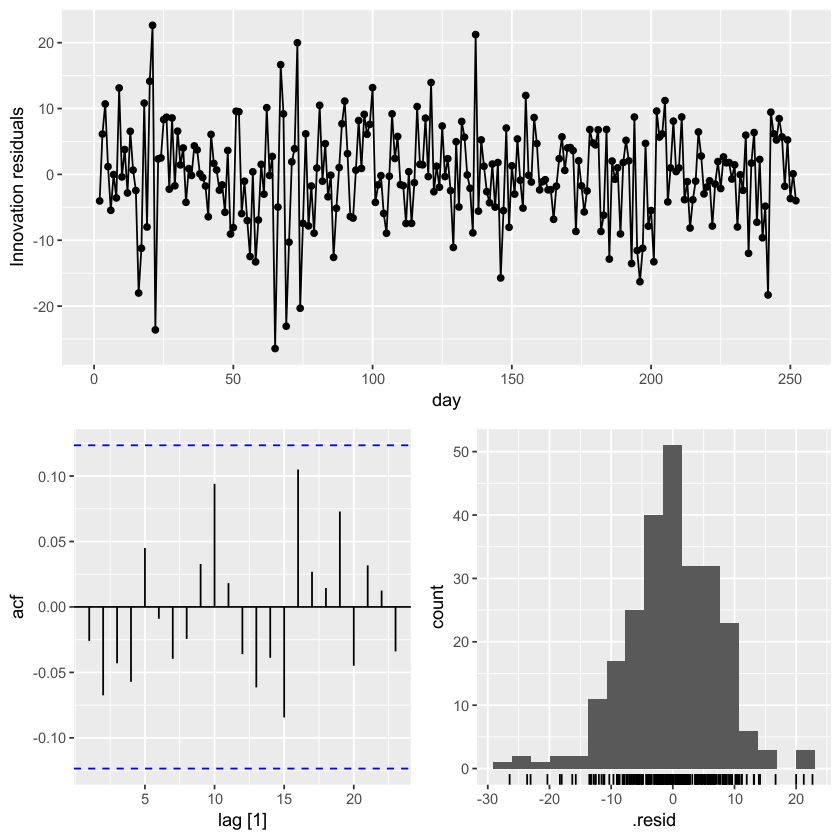

In [47]:
# One in all gg_tsresiduals()


google_2014|>model(NAIVE(Close))|> gg_tsresiduals()

In [49]:
aug|> features(.innov, box_pierce, lag=10)

Symbol,.model,bp_stat,bp_pvalue
<chr>,<chr>,<dbl>,<dbl>
GOOG,NAIVE(Close),6.161238,0.8015396


In [50]:
aug|> features(.innov, ljung_box, lag=10)

Symbol,.model,lb_stat,lb_pvalue
<chr>,<chr>,<dbl>,<dbl>
GOOG,NAIVE(Close),6.369628,0.7833118


5.5

In [52]:
# Prediction intervals can easily be computed for you when using the fable package. For example here is the output when using the naive method for the Google stock price
library(fable)

google_2014|> model(NAIVE(Close))|>forecast(h=10) |> hilo()

Symbol,.model,day,Close,.mean,80%,95%
<chr>,<chr>,<dbl>,<dist>,<dbl>,<hilo>,<hilo>
GOOG,NAIVE(Close),253,"N(524, 55)",523.5214,"[514.0224, 533.0205]80","[508.9939, 538.0490]95"
GOOG,NAIVE(Close),254,"N(524, 110)",523.5214,"[510.0877, 536.9551]80","[502.9764, 544.0665]95"
GOOG,NAIVE(Close),255,"N(524, 165)",523.5214,"[507.0686, 539.9743]80","[498.3590, 548.6839]95"
GOOG,NAIVE(Close),256,"N(524, 220)",523.5214,"[504.5233, 542.5195]80","[494.4664, 552.5765]95"
GOOG,NAIVE(Close),257,"N(524, 275)",523.5214,"[502.2809, 544.7619]80","[491.0369, 556.0060]95"
GOOG,NAIVE(Close),258,"N(524, 330)",523.5214,"[500.2536, 546.7892]80","[487.9364, 559.1065]95"
GOOG,NAIVE(Close),259,"N(524, 385)",523.5214,"[498.3893, 548.6535]80","[485.0852, 561.9577]95"
GOOG,NAIVE(Close),260,"N(524, 440)",523.5214,"[496.6541, 550.3888]80","[482.4313, 564.6115]95"
GOOG,NAIVE(Close),261,"N(524, 494)",523.5214,"[495.0243, 552.0186]80","[479.9388, 567.1040]95"


[[1]]

$y
[1] "$US"

$title
[1] "Google daily closing stock price"

attr(,"class")
[1] "labels"

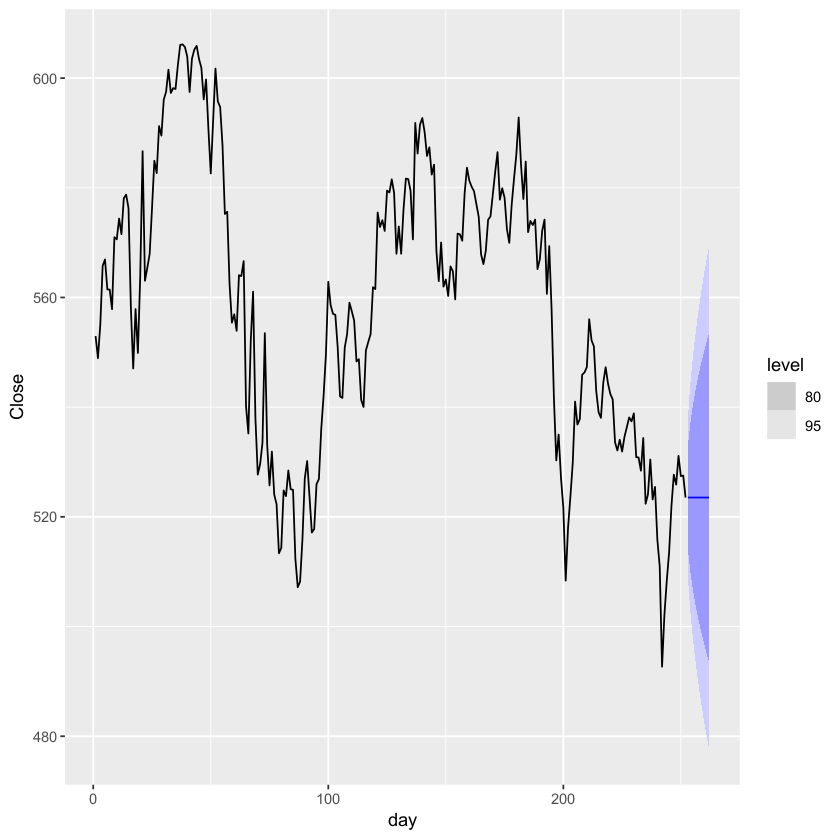

In [53]:
# The hilo() funciton converts the forecasts into intervals. By default 80% andf 95% prediction  intervals are returned, although other options are possible via the level argument


google_2014|> model(NAIVE(Close)) |> forecast(h=10)|> autoplot(google_2014) |> labs(title="Google daily closing stock price", y="$US")

In [54]:
fit<- google_2014|> model(NAIVE(Close))

In [55]:
sim<- fit|> generate(h=30, times=5, bootstrap=T)

In [57]:
sim

Symbol,.model,.rep,day,.innov,.sim
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
GOOG,NAIVE(Close),1,253,9.30681312,532.8282
GOOG,NAIVE(Close),1,254,2.53398612,535.3622
GOOG,NAIVE(Close),1,255,-7.33173688,528.0305
GOOG,NAIVE(Close),1,256,-0.76789388,527.2626
GOOG,NAIVE(Close),1,257,16.77568612,544.0383
GOOG,NAIVE(Close),1,258,-7.32178788,536.7165
GOOG,NAIVE(Close),1,259,-3.74146488,532.9750
GOOG,NAIVE(Close),1,260,-7.70966588,525.2654
GOOG,NAIVE(Close),1,261,8.80083112,534.0662


Five simulated future smaple paths of the GOogle closing stock price based on a naive method with bootstrapped residuals

$colour
[1] "none"

attr(,"class")
[1] "guides"

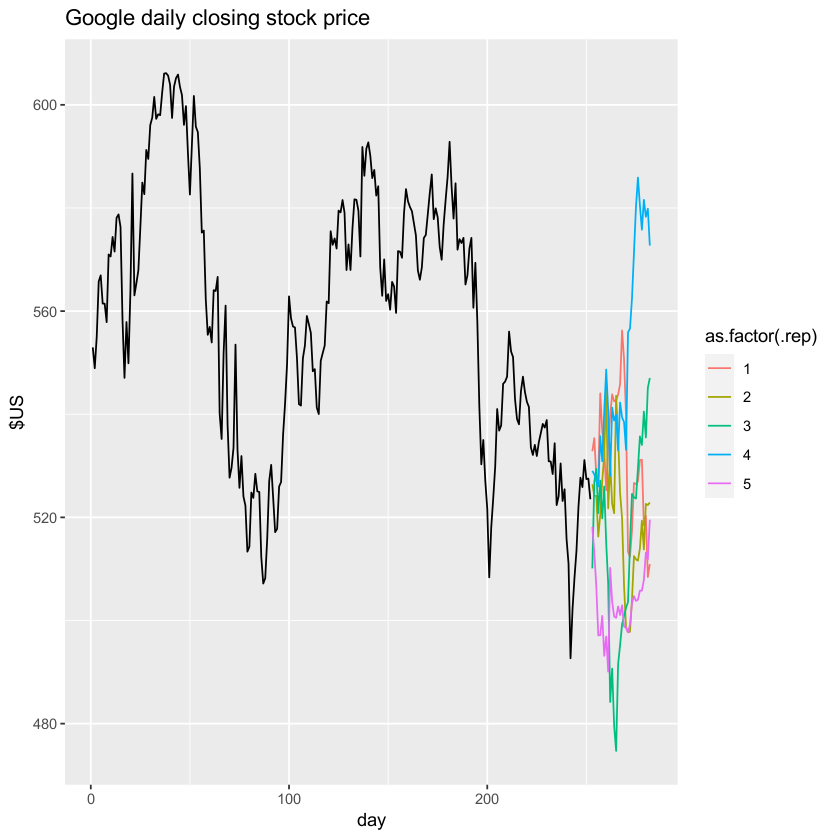

In [58]:
# Here we have generated five possible sample paths for the next 30 trading days. The .rep vaiable provides a new key for the tsibble. The plot below shows the five sample paths along with the historical data.


google_2014|> ggplot(aes(x = day)) +
geom_line(aes(y = Close)) +
geom_line(aes(y = .sim, colour = as.factor(.rep)),
data = sim) +
labs(title = "Google daily closing stock price", y = "$US")
guides(colour = "none")

In [59]:
fc <- fit|> forecast(h = 30, bootstrap = T)
fc

Symbol,.model,day,Close,.mean
<chr>,<chr>,<dbl>,<dist>,<dbl>
GOOG,NAIVE(Close),253,sample[5000],523.4060
GOOG,NAIVE(Close),254,sample[5000],523.5395
GOOG,NAIVE(Close),255,sample[5000],523.6306
GOOG,NAIVE(Close),256,sample[5000],523.7319
GOOG,NAIVE(Close),257,sample[5000],523.7250
GOOG,NAIVE(Close),258,sample[5000],523.7778
GOOG,NAIVE(Close),259,sample[5000],523.5600
GOOG,NAIVE(Close),260,sample[5000],523.6563
GOOG,NAIVE(Close),261,sample[5000],523.5672


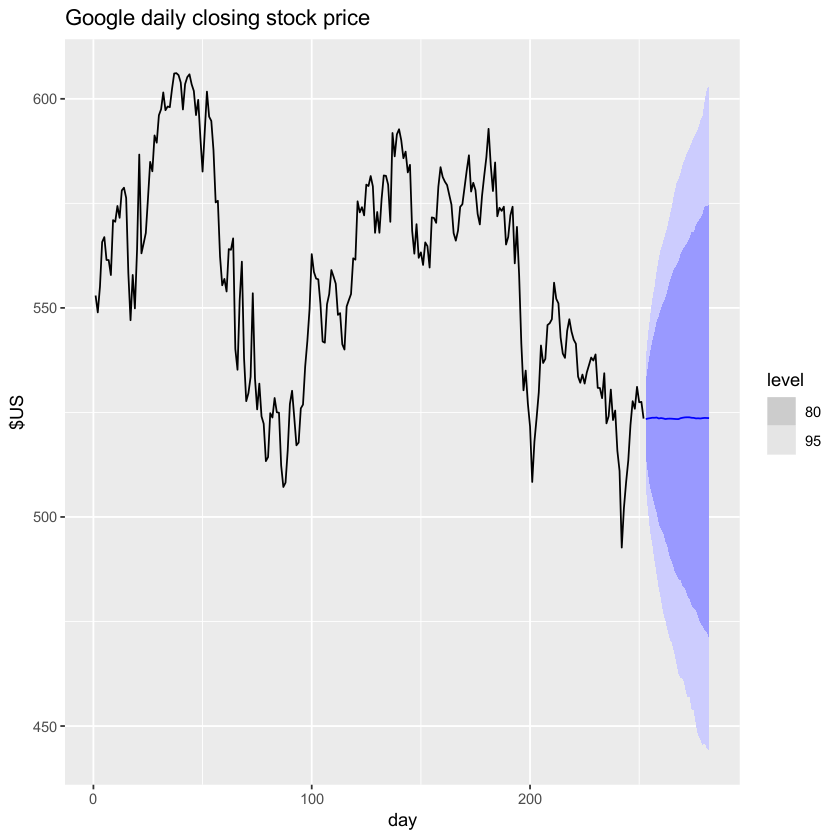

In [60]:
autoplot(fc, google_2014) + labs(title = "Google daily closing stock price", y="$US")

In [61]:
# The number of samples can be controlled using the times argument for forecast(). For example, intervals based on 1000 bootstrap samples can be sampled with:

google_2014|> model(NAIVE(Close)) |> forecast(h = 10, bootstrap = T, times = 1000) |> hilo()

Symbol,.model,day,Close,.mean,80%,95%
<chr>,<chr>,<dbl>,<dist>,<dbl>,<hilo>,<hilo>
GOOG,NAIVE(Close),253,sample[1000],523.6138,"[514.7576, 532.3223]80","[507.8911, 540.2971]95"
GOOG,NAIVE(Close),254,sample[1000],523.5294,"[510.3932, 535.3334]80","[502.2428, 544.4373]95"
GOOG,NAIVE(Close),255,sample[1000],523.4694,"[508.1483, 538.9584]80","[498.6523, 546.6660]95"
GOOG,NAIVE(Close),256,sample[1000],523.6153,"[505.4847, 541.2447]80","[493.6723, 549.8817]95"
GOOG,NAIVE(Close),257,sample[1000],523.5837,"[502.5646, 543.5128]80","[490.9812, 551.8475]95"
GOOG,NAIVE(Close),258,sample[1000],523.7971,"[500.3504, 547.0764]80","[485.5838, 557.8542]95"
GOOG,NAIVE(Close),259,sample[1000],523.8325,"[498.1599, 548.4784]80","[484.3127, 562.2820]95"
GOOG,NAIVE(Close),260,sample[1000],524.1015,"[498.1621, 549.5075]80","[484.2229, 564.1544]95"
GOOG,NAIVE(Close),261,sample[1000],524.4835,"[497.4895, 550.5998]80","[481.2994, 565.3465]95"
